In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('online_retail.csv')

In [3]:
df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [5]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()

/var/folders/rc/4f1fxxws5jqdl20r_nwrdh3h0000gn/T/ipykernel_1730/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Quantity,UnitPrice,CustomerID
index,1.000000,0.000110,-0.004243,0.001697
Quantity,0.000110,1.000000,-0.001235,-0.003600
UnitPrice,-0.004243,-0.001235,1.000000,-0.004560
CustomerID,0.001697,-0.003600,-0.004560,1.000000


In [8]:
df.dropna(inplace = True, axis=0)

In [9]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]
#This line calculates the sales for each row by multiplying the "Quantity" and "UnitPrice" columns and
#assigns the result to a new column named "Sales."

dataset = df.loc[df["Sales"] > 0.01].reset_index(drop=True)

#This line filters the original dataset(data) to include only those rows where the "Sales" value is greater than0.01.
#The reset_index(drop=True) part is used to reset the index of the resulting DataFrame.

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
#converts the "InvoiceDate" column to a pandas datetime object, allowing for easier manipulation and
#analysis of date-related information.

In [11]:
df["Day"] = df["InvoiceDate"].dt.day
df["Month"] = df["InvoiceDate"].dt.month
df["Year"] = df["InvoiceDate"].dt.year
#Extract day, month, and year from "InvoiceDate"

In [12]:
numerical_columns = df[["Day", "Month", "Year", "Quantity", "UnitPrice", "Sales"]]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")
    
#f"Minimum {col}: {data[col].min()} | Maximum {col}: {data[col].max()}": This is an f-string, a formatted 
#string literal in Python. It allows you to embed expressions inside string literals, 
#using curly braces {} to represent the expressions.    


Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2011
Minimum Quantity: -80995 | Maximum Quantity: 80995
Minimum UnitPrice: 0.0 | Maximum UnitPrice: 38970.0
Minimum Sales: -168469.6 | Maximum Sales: 168469.6


In [13]:
df.head(15)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,1,12,2010
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,1,12,2010
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1,12,2010
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1,12,2010
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1,12,2010


<Figure size 1500x800 with 0 Axes>

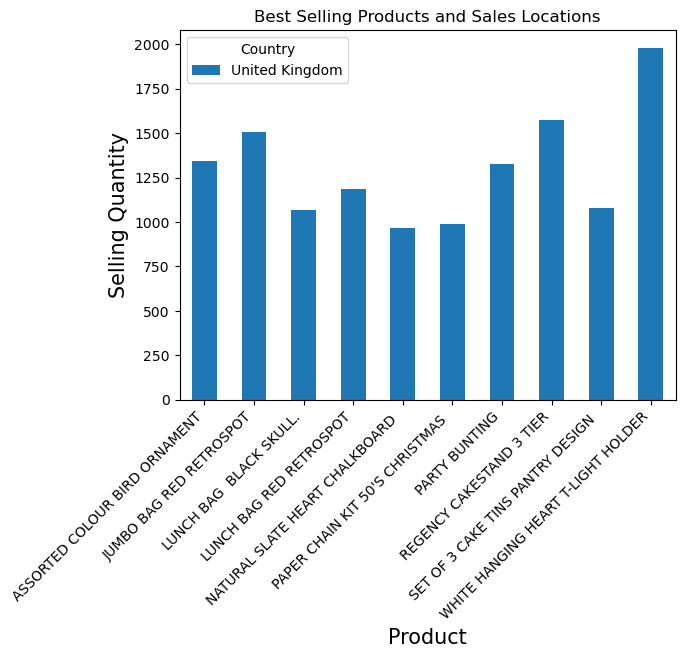

In [14]:
plt.figure(figsize=(15, 8))

# Group by "Description" and "Country," count the quantity, get the top 10 for each country,
# and create a stacked bar plot
country_quantity = df.groupby(["Description", "Country"])["Quantity"].count().nlargest(10).unstack().plot(kind="bar", stacked=True)

# Set plot title and axis labels
plt.title("Best Selling Products and Sales Locations")
plt.xlabel("Product", fontsize=15)
plt.ylabel("Selling Quantity", fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


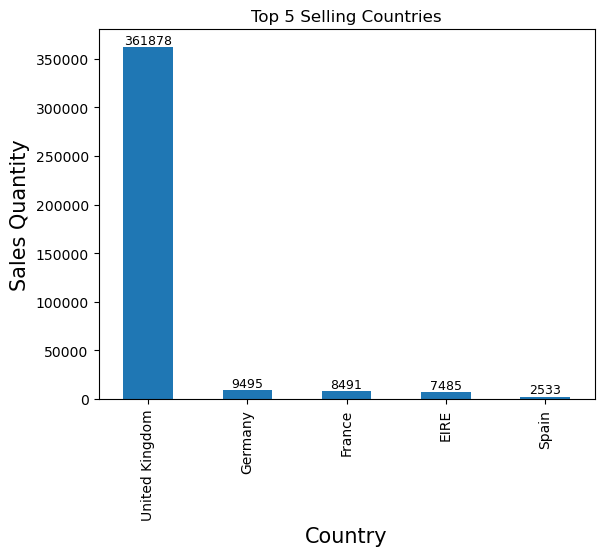

In [15]:
country_sales = df.groupby("Country")["Sales"].count().nlargest()
#Groups the data by "Country," counts the sales, and selects the top 5 selling countries using nlargest().

country_sales.plot(kind = "bar")

# iterates through each country and sales quantity to add text annotations on top of each bar
for i, count in enumerate(country_sales):
    plt.text(i, count +1, str(count), ha="center", va="bottom", fontsize=9)
    
plt.title("Top 5 Selling Countries")
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Sales Quantity", fontsize = 15)
plt.show()

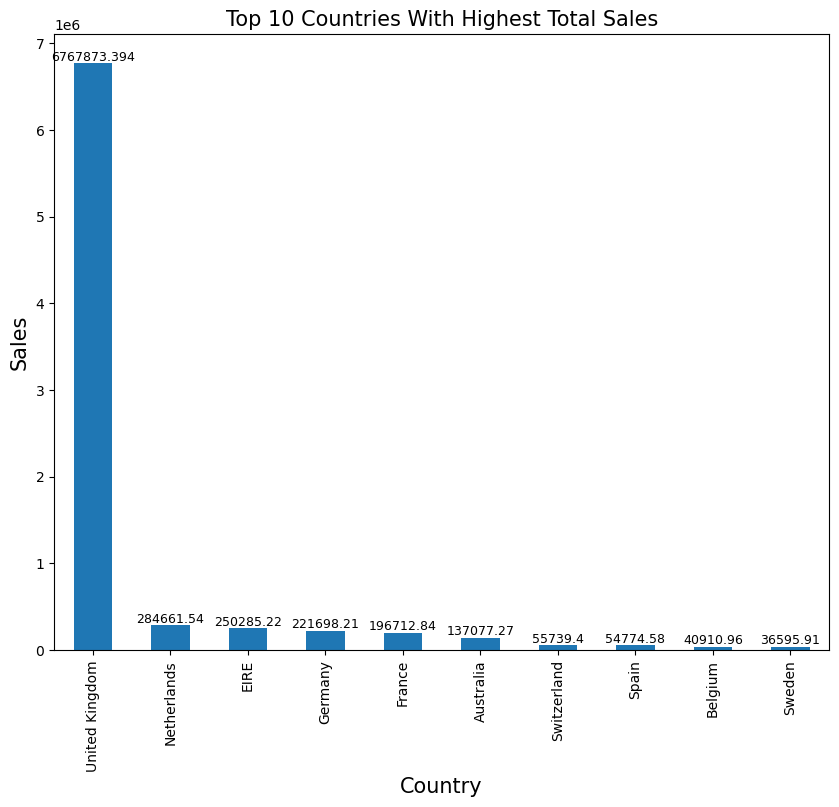

In [17]:
plt.figure(figsize=(10, 8))

# Group by "Country," calculate the sum of sales, and select the top 10 countries
country_sales = df.groupby("Country")["Sales"].sum().nlargest(10)

# Create a bar plot
country_sales.plot(kind="bar")

# Adding text annotations on top of each bar
for i, count in enumerate(country_sales):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=9)

# Set plot title and axis labels
plt.title("Top 10 Countries With Highest Total Sales", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Sales", fontsize=15)

# Display the plot
plt.show()


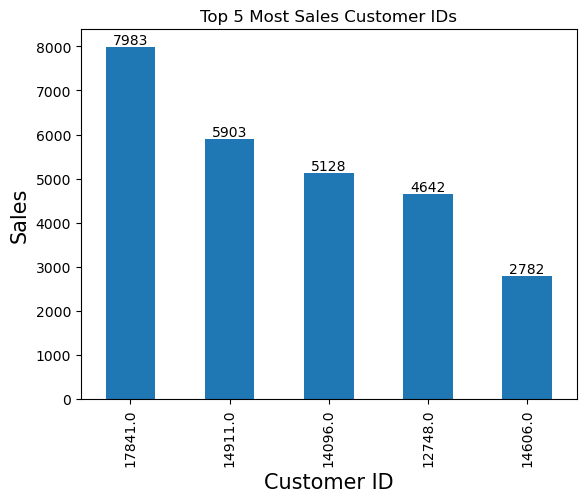

In [19]:
customerid_sales = df.groupby("CustomerID")["Sales"].count().nlargest(5)

# Create a bar plot
customerid_sales.plot(kind="bar")

# Adding text annotations on top of each bar
for i, count in enumerate(customerid_sales):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=10)

# Set plot title and axis labels
plt.title("Top 5 Most Sales Customer IDs")
plt.xlabel("Customer ID", fontsize=15)
plt.ylabel("Sales", fontsize=15)

# Display the plot
plt.show()


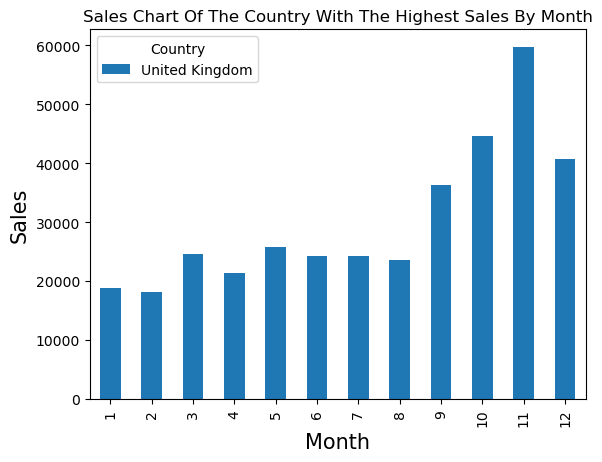

In [21]:
df.groupby(["Month", "Country"])["Country"].count().nlargest(12).unstack().plot(kind="bar", stacked=True)

# Set plot title and axis labels
plt.title("Sales Chart Of The Country With The Highest Sales By Month")
plt.xlabel("Month", fontsize=15)
plt.ylabel("Sales", fontsize=15)

# Display the plot
plt.show()
